<a href="https://colab.research.google.com/github/kaitouz/OpenEdu/blob/main/Image%20Processing/Image_processing_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300

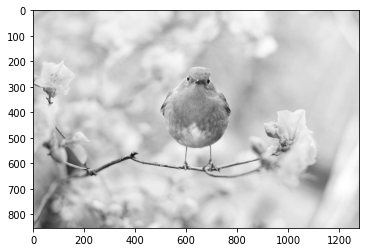

In [2]:
img1 = cv2.imread('1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap = 'gray')

In [33]:
f = np.fft.fft2(img1)
print(f[168, 966])

(-3553.777943429797-3693.266618635109j)


In [6]:
img1.shape

(853, 1280)

In [34]:
fshift = np.fft.fftshift(f)
print(fshift[426][640] == f[0][0])

True


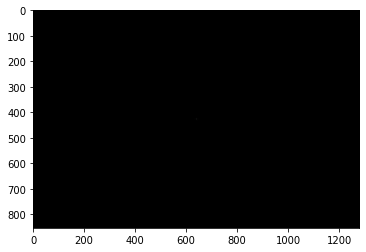

In [35]:
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [36]:
print('min:', np.min(magnitude_spectrum), 'max:', np.max(magnitude_spectrum))
print(magnitude_spectrum[426][640])

min: 5.774139445661662 max: 218893633.0
218893633.0


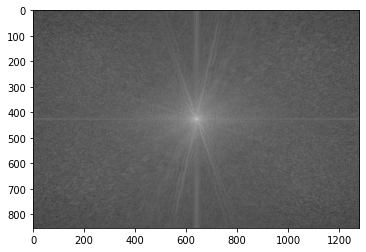

In [37]:
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [38]:
magnitude_spectrum.max() - magnitude_spectrum.min()

17.290984140690085

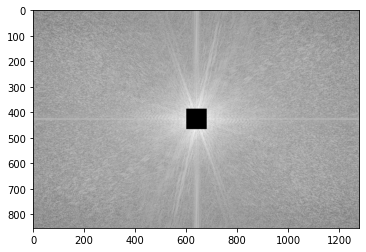

In [39]:
fshift[426 -  40 : 426 + 40, 640-40 : 640 + 40] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

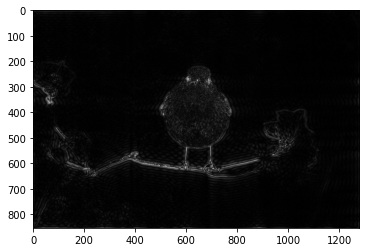

In [40]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

In [41]:
img_back[655,410]

0.6361280892970885

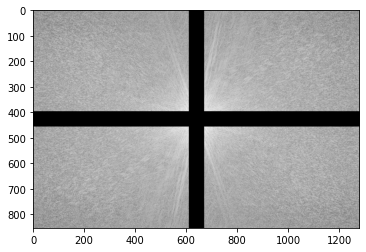

In [22]:
f = np.fft.fft2(img1)
fshift = np.fft.fftshift(f)
fshift[426 - 30 : 426 + 30, 0 : 640 - 30] = fshift[426 - 30 : 426 + 30, 426+30 : 1280] = 0
fshift[0 : 426 - 30, 640 - 30 : 640 + 30] = fshift[426 + 30 : 853, 640 - 30 : 640 + 30] = 0
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

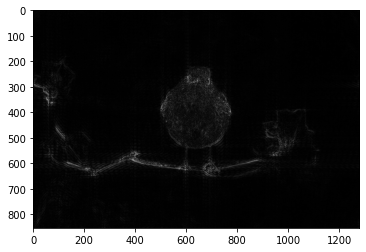

In [23]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.imshow(img_back, cmap = 'gray')

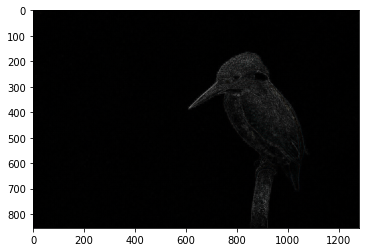

In [57]:
img2 = cv2.imread('2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
laplacian = cv2.Laplacian(img2, -1)
plt.imshow(laplacian)

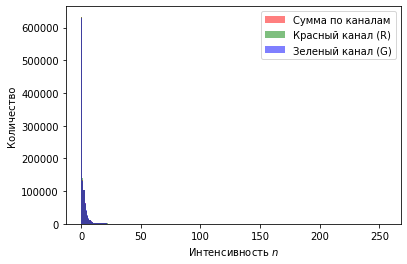

In [64]:
# plt.hist(laplacian.ravel(), bins = 256, color = 'orange', alpha = 0.5) 
plt.hist(laplacian[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5)
plt.hist(laplacian[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(laplacian[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.legend(['Сумма по каналам', 'Красный канал (R)', 'Зеленый канал (G)', 'Cиний канал (B)'])
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.show()

3279360.0

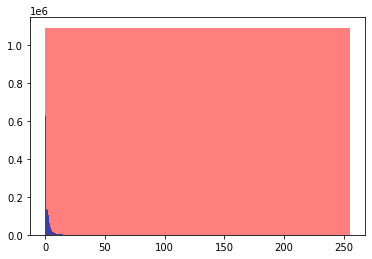

In [72]:
x1, y, _ = plt.hist(laplacian[:, :, 0].ravel(), bins = 1, color = 'Red', alpha = 0.5)
x2, y, _ =plt.hist(laplacian[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
x3, y, _ = plt.hist(laplacian[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
x1.sum() + x2.sum() + x3.sum()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2f8b86a700>,
 <matplotlib.image.AxesImage at 0x7f2f8d29b580>)

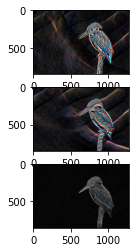

In [73]:
sobel_x = cv2.Sobel(img2, -1, 1, 0, ksize = 5)
sobel_y = cv2.Sobel(img2, -1, 0, 1, ksize = 5)
sobel_full = cv2.Sobel(img2, -1, 1, 1, ksize = 5)
plt.subplot(3,1,1),plt.imshow(sobel_x, cmap = 'gray')
plt.subplot(3,1,2),plt.imshow(sobel_y, cmap = 'gray')
plt.subplot(3,1,3),plt.imshow(sobel_full, cmap = 'gray')

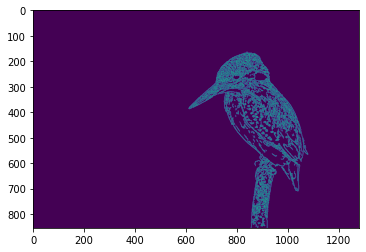

In [76]:
canny = cv2.Canny(img2, 100, 200)
plt.imshow(canny)

1093120.0

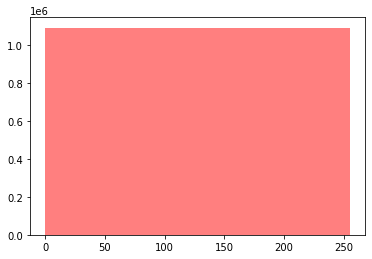

In [79]:
x4, y, _ = plt.hist(canny.ravel(), bins = 1, color = 'Red', alpha = 0.5)
x4.sum()

In [77]:
canny.sum()

6586905